<a href="https://colab.research.google.com/github/pds2021/a5-TJopp/blob/assignment_5/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Practical Data Science 20/21*
# Programming Assignment 5 - Create your own App

In this programming assignment you'll build a model that serves as a foundation for your own app. To this end, you will create your own dataset, build a deep learning model on this data, and deploy it!

In [1]:
!pip install -Uqq fastai  # upgrade fastai on colab

     |████████████████████████████████| 194kB 10.3MB/s 
     |████████████████████████████████| 61kB 4.4MB/s 


In [2]:
from fastai.vision.all import *
from fastai.vision.widgets import *

__Google Drive integration__

If you want to store and access your downloaded data for this assignment you can use the following code:

In [3]:
from google.colab import drive
drive.mount('/content/drive')
#!mkdir /content/drive/My\ Drive/pds_a5
%cd /content/drive/My\ Drive/pds_a5

Mounted at /content/drive
mkdir: cannot create directory ‘/content/drive/My Drive/pds_a5’: File exists
/content/drive/My Drive/pds_a5


## Develop an Application Idea

___Free your mind - this part is totally up to you.___

Think of an app that you'd like to build.
*   What useful app have you been missing?
*   Do you have any hobbies an app could be helpful for?
*   Is this a suitable classification or regression task? 
*   How could you get the data?


In [ ]:
# Write down your app idea here

# Horse Classifier
# - es sollen die 3 folgenden Pferdegattungen erkannt werden:
#   - Warmblüter (warmbloods): werden eher als Reitpferde eingesetzt
#   - Kaltblüter (heavy horse): zeichnen sich durch hohes Körpergewicht und ruhiges Temperament aus und werden als schwere Zugpferde eingesetzt
#   - Vollblüter (thoroughbreds): Zuchtgeschichte geht auf arabische Pferde zurück

# - classification task
# - Bilder werden von DuckDuckGo gescrapt

# - da ich Warmblüter und Vollblüter nie auseinanderhalten kann, absolut sinnvolle App für mich :)

You can get an inspiration from these Apps:

<table>
<tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/5.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/400">Guitar Classifier</a> by Christian Werner</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/6.png"><br><a href="https://forums.fast.ai/t/share-your-work-here/27676/340">Healthy or Not!</a> by Nikhil Utane </td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/7.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/333">Hummingbird Classifier</a> by Nissan Dookeran</td>
</tr><tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/8.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/409">Edible Mushroom?</a> by Ramon</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/9.png"><br> <a href="https://forums.fast.ai/t/share-your-work-here/27676/387">Cousin Recognizer</a> by Charlie Harrington</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/10.png"><br> <a href="https://forums.fast.ai/t/share-your-work-here/27676/386">Emotion Classifier</a> by Ethan Sutin and Team 26</td>
</tr><tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/11.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/350">American Sign Language</a> by Keyur Paralkar</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/12.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/355">Your City from Space</a> by Henri Palacci</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/13.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/367">Univariate TS as images using Gramian Angular Field</a> by Ignacio Oguiza</td>
</tr><tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/14.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/348">Face Expression Recognition</a> by Pierre Guillou</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/15.png"><br><a href="https://forums.fast.ai/t/share-your-work-here/27676/352">Tumor-normal sequencing</a> by Alena Harley</td><td>  </td>
</tr><table>

## Creating your own Dataset

Now you need to construct a dataset that allows you to train a model for your app. You learned about how to create a dataset in Lecture 7.

Here, you can follow the steps from the lecture or look into the following ressources:

*   A [tool](https://github.com/toffebjorkskog/ml-tools/blob/master/gi2ds.md) for excluding irrelevant images from Google Image Search results beforehand by @melonkernel
*   See this [post](https://www.christianwerner.net/tech/Build-your-image-dataset-faster/) about an alternative image downloader/cleaner by @cwerner
*   Of course, you can use your own data/images :) 

### 1. Dowload the data 
- You may use the helper functions from the lecture to get the image URLs
- Create a new folder at your defined `path`
- Use `download_image` to download the images into the corresponding (sub-)directories

In [20]:
# Write your code here
import requests
import re
import json
from fastcore.foundation import L

def search_images_ddg(key,max_n=400):
    """Search for 'key' with DuckDuckGo and return a unique urls of 'max_n' images
    (Adopted from https://github.com/deepanprabhu/duckduckgo-images-api and 
    https://github.com/fastai/fastbook/blob/master/utils.py)
    """
    url        = 'https://duckduckgo.com/'
    params     = {'q':key}
    res        = requests.post(url,data=params)
    searchObj  = re.search(r'vqd=([\d-]+)\&',res.text)
    if not searchObj: print('Token Parsing Failed !'); return
    requestUrl = url + 'i.js'
    headers    = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:71.0) Gecko/20100101 Firefox/71.0',
                 'referer': 'https://duckduckgo.com/'}
    params     = (('l','us-en'),('o','json'),('q',key),('vqd',searchObj.group(1)),('f',',,,'),('p','1'),('v7exp','a'))
    urls       = []
    while True:
        try:
            res  = requests.get(requestUrl,headers=headers,params=params)
            data = json.loads(res.text)
            for obj in data['results']:
                urls.append(obj['image'])
                max_n = max_n - 1
                if max_n < 1: return L(set(urls))     # dedupe
            if 'next' not in data: return L(set(urls))
            requestUrl = url + data['next']
        except:
            pass

In [6]:
#löschen
ims = search_images_ddg('thoroughbred')
len(ims)

366

In [8]:
#löschen
pd.DataFrame({'urls':ims})

,urls
0,http://www.tbv.com.au/wp-content/uploads/2015/02/three-bridges-thoroughbred-stryker.jpg
1,https://www.paulickreport.com/wp-content/uploads/2016/02/paintingthesky.jpg
2,https://www.pets4homes.co.uk/images/classifieds/2013/05/09/299503/large/stunning-thoroughbred-mare-518bbabd044b0.jpg
3,https://thumbs.dreamstime.com/z/thoroughbred-horse-grazing-20841172.jpg
4,https://i.ytimg.com/vi/TbH04naF2fY/maxresdefault.jpg
...,...
361,https://www.thoroughbredracing.com/media/filer_public_thumbnails/drupal_files/rsz_1image_20120208_121730_9163.jpg__300x300_q85_crop_subsampling-2.jpg
362,https://www.thoroughbred-horses-for-sale.com/wp-content/uploads/2016/07/True-Prince_20160509_008.jpg
363,https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/thoroughbred-rear-view-cheryl-poland.jpg
364,https://img.equinenow.com/slir/w600/stallions/data/photos/1132688/1489467063/barrel-thoroughbred-horse.jpg


In [9]:
#löschen
dest = 'thoroughbred.jpg'
download_url(ims[2], dest)

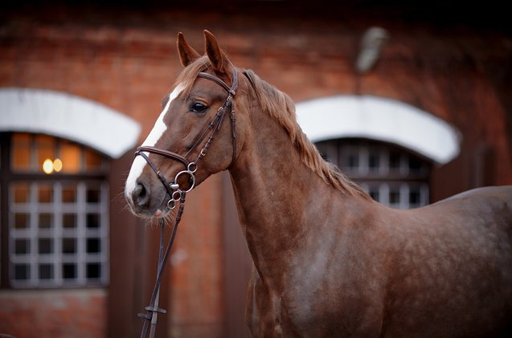

In [10]:
#löschen
im = Image.open(dest)
im.to_thumb(512,512)

In [21]:
horse_types = 'warmbloods','heavy horse','thoroughbred'
path = Path('horses')

In [22]:
if not path.exists(): 
  path.mkdir()
  for o in horse_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} horse')
    download_images(dest, urls=results) # convenience function, um Bilder herunterzuladen

### 2. Verify Images
- First, create a list of all your images
- Use `verify_images` and `unlink` to remove broken images

In [29]:
# Write your code here
fns = get_image_files(path)
fns # 1021 Bilder wurden heruntergeladen; nach unlink 1011 Bilder

(#1011) [Path('horses/warmbloods/00000002.jpg'),Path('horses/warmbloods/00000003.jpg'),Path('horses/warmbloods/00000009.jpg'),Path('horses/warmbloods/00000005.jpg'),Path('horses/warmbloods/00000001.jpg'),Path('horses/warmbloods/00000007.jpg'),Path('horses/warmbloods/00000008.jpg'),Path('horses/warmbloods/00000011.JPG'),Path('horses/warmbloods/00000006.jpg'),Path('horses/warmbloods/00000012.jpg')...]

In [26]:
failed = verify_images(fns)
failed # 10 Bilder wurden gefunden, die er nicht richtig laden kann

(#10) [Path('horses/heavy horse/00000091.jpg'),Path('horses/heavy horse/00000107.jpg'),Path('horses/heavy horse/00000141.jpg'),Path('horses/heavy horse/00000308.png'),Path('horses/thoroughbred/00000112.jpg'),Path('horses/thoroughbred/00000122.jpg'),Path('horses/thoroughbred/00000176.jpg'),Path('horses/thoroughbred/00000191.jpg'),Path('horses/thoroughbred/00000316.jpg'),Path('horses/thoroughbred/00000319.jpg')]

In [28]:
failed.map(Path.unlink)

(#10) [None,None,None,None,None,None,None,None,None,None]

### 3. Create the DataBlock
For this, you need to think of:
- What kinds of data we are working with
- How to get the list of items
- How to label these items
- How to create the validation set

Use `RandomResizedCrop` for `item_tfms`with an image size of 224 px, and the appropriate `aug_transforms` as `batch_tfms`.

In [102]:
# Write your code here
horses = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # wir wollen nur ein Label erkennen; ansonsten wäre MultiCategoryBlock anstatt CategoryBlock notwendig
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label, # übergeordneter Ordner entspricht dem Label
)

In [103]:
horses = horses.new(
    item_tfms = RandomResizedCrop(224, min_scale=0.5), # nimmt Bild und zeigt verschiedene Ausschnitte, die immer gleich groß sind (224 px) (schon Art Augmentation)
    batch_tfms = aug_transforms() # da wir nicht unendlich viele Daten haben (könnte sonst nur auf den 400 Bildern lernen)
)

### 4. Create the DataLoaders

In [104]:
# Write your code here
dls = horses.dataloaders(path)

### 5. Take a look at some of your pictures. 
Does everything look as expected?

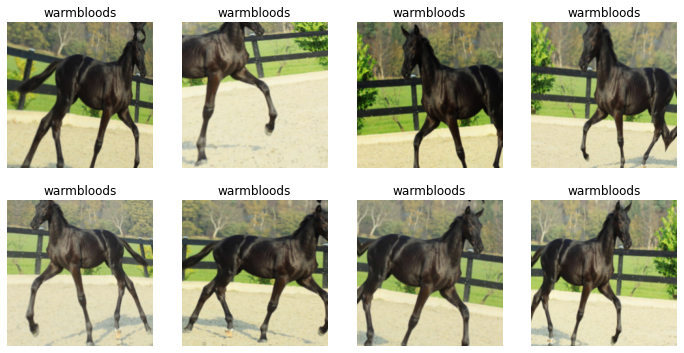

In [58]:
# Write your code here
dls.train.show_batch(max_n=8, nrows=2, unique=True)

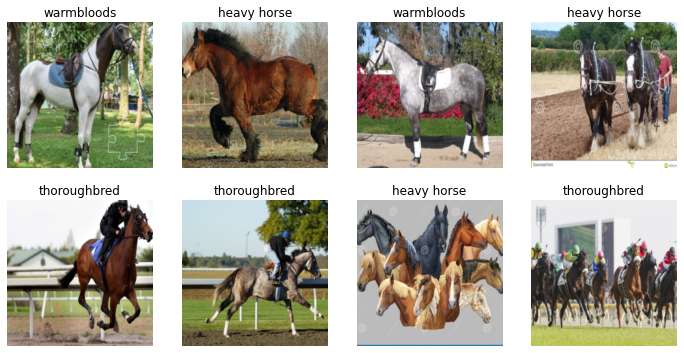

In [59]:
dls.valid.show_batch(max_n=8, nrows=2)

## Modeling

### 6. Create a learner

Create an appropriate learner for your data
- Choose an appropriate model [architecture](https://fastai1.fast.ai/vision.models.html)
- Choose appropriate [metrics](https://docs.fast.ai/metrics.html) for your task

In [105]:
# Write your code here
learn = cnn_learner(dls, models.resnet18, metrics=accuracy) # resnet18 braucht wesentlich weniger Speicherplatz

### 7. Fit the model

Use your knowdledge on model training to fit your model!

In [106]:
# Write your code here
learn.fine_tune(4) # 4 Runden werden trainiert

# evtl. nochmal ANPASSEN nach Besprechung des 4. Assignments
# - nach der 3. epoch sinkt die accuracy
# - 3 epochs scheinen perfekt zu sein
# - aber bei nur 3 epochs sinkt die accuracy bereits nach dem 1. epoch

epoch,train_loss,valid_loss,accuracy,time
0,1.606045,0.801035,0.715000,00:31


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f6afe24f9b0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1177, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f6afe24f9b0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    sel

epoch,train_loss,valid_loss,accuracy,time
0,0.895056,0.637917,0.755000,00:31
1,0.831899,0.587790,0.800000,00:31
2,0.714813,0.529605,0.815000,00:31
3,0.635342,0.517608,0.810000,00:31


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f6afe24f9b0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1177, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f6afe24f9b0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    sel

In [69]:
learn.fine_tune(10) # 10 Runden werden trainiert

epoch,train_loss,valid_loss,accuracy,time
0,0.449731,0.569132,0.821782,00:30


epoch,train_loss,valid_loss,accuracy,time
0,0.412972,0.558499,0.816832,00:31
1,0.435726,0.576452,0.801980,00:31
2,0.390170,0.682697,0.801980,00:30
3,0.351316,0.763207,0.737624,00:31
4,0.338332,0.648921,0.806931,00:30
5,0.301065,0.604251,0.801980,00:31
6,0.281944,0.617089,0.826733,00:31
7,0.265205,0.614925,0.806931,00:32
8,0.235633,0.621402,0.801980,00:31
9,0.208419,0.624113,0.801980,00:31


In [71]:
learn.fine_tune(3) # 3 Runden werden trainiert

epoch,train_loss,valid_loss,accuracy,time
0,0.138595,0.640285,0.792079,00:31


epoch,train_loss,valid_loss,accuracy,time
0,0.167106,0.643373,0.801980,00:31
1,0.161181,0.732323,0.777228,00:31
2,0.135183,0.765800,0.787129,00:31


In [74]:
learn.save('4-epochs')
# 3-epochs
# 4-epochs
# 10-epochs

Path('models/4-epochs.pth')

In [ ]:
learn = learn.load('')

### 8. Evaluate the model

You' ve already seen many ways to evaluate a model. Evaluate your model in a qualitative and quantitative manner.

In [107]:
# Write your code here
interp = ClassificationInterpretation.from_learner(learn)

Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f6afe24f9b0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1177, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f6afe24f9b0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    sel

In [108]:
interp.print_classification_report() # quantitativ

              precision    recall  f1-score   support

 heavy horse       0.89      0.89      0.89        73
thoroughbred       0.83      0.67      0.74        57
  warmbloods       0.73      0.84      0.78        70

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.82      0.81      0.81       200



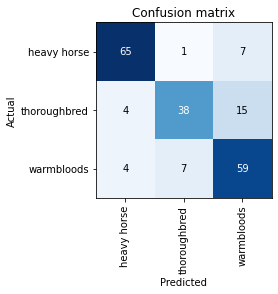

In [109]:
# Confusion matrix (quantitativ)
interp.plot_confusion_matrix()
# sind insgesamt nur 202 Predicted, da validation set 20% des gesamten Datensatzes (1.011 Bilder) beträgt

In [110]:
interp.most_confused(min_val=3)

[('thoroughbred', 'warmbloods', 15),
 ('heavy horse', 'warmbloods', 7),
 ('warmbloods', 'thoroughbred', 7),
 ('thoroughbred', 'heavy horse', 4),
 ('warmbloods', 'heavy horse', 4)]

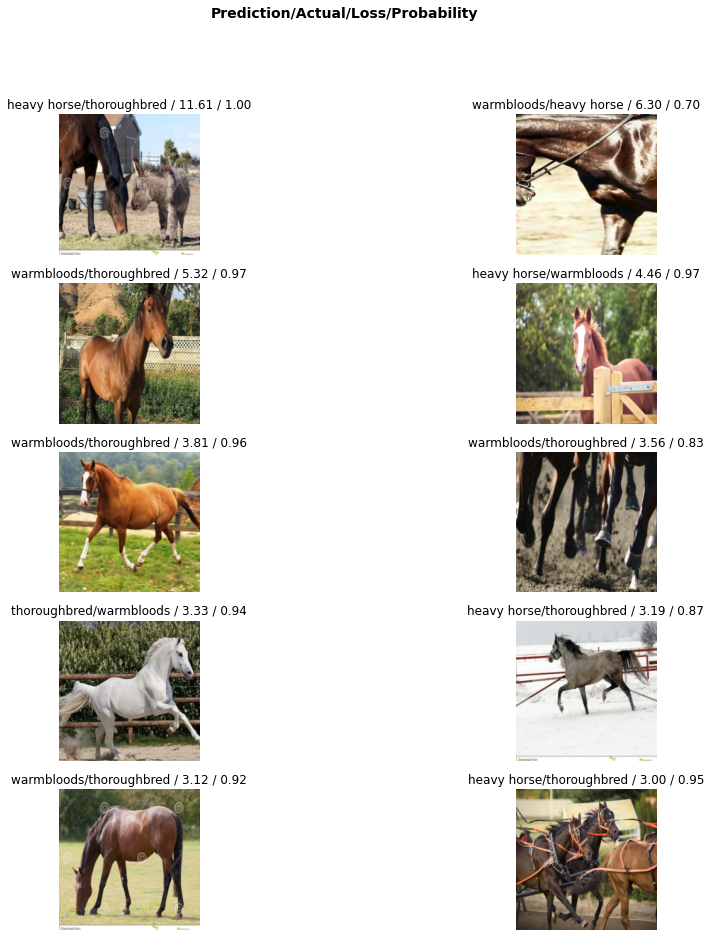

In [111]:
# Top Losses (qualitativ)
interp.plot_top_losses(10, nrows=5, figsize=(15,15)) 

### 9. Clean your data

Based on the evaluation, you may want to clean your data using the `ImageClassifierCleaner`.
- Remeber to delete the selected data after using the cleaner:
    ```python
    for idx in cleaner.delete(): cleaner.fns[idx].unlink()
    ```
    
    
- Once we've cleaned up our data, we can retrain our model. 



In [100]:
# Write your code here
cleaner = ImageClassifierCleaner(learn)

FileNotFoundError: ignored

In [99]:
cleaner
# nachdem dieser Schritt abgeschlossen ist, muss Modell nochmal trainiert werden

# evtl. noch etwas anpassen (werden immer noch einige thoroughbreds als warmbloods klassifiziert)

In [98]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [97]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

## Turning Your Model into an Online Application

Now, take your app into production. You can follow the steps from the lecure:

- Export your model via `learn.export`
- Upload your model to [Github Releases](https://docs.github.com/en/free-pro-team@latest/github/administering-a-repository/about-releases) to make it publicly available at your repository.
- Create and upload a new notebook that only contains the necassary code and IPython widgets for your App. 
    - Remeber to download the exported model from *Github Releases*
    - Include a brief description of your app and the functionalities
- Publish your web app on [Binder](https://mybinder.org/) using Voilà

You can use the [example](https://github.com/pds2021/course/blob/main/nbs/07_Bear_App.ipynb) from the lecture as an orientation.

If you're familiar with the world of web application development, you're free to use these skills and all your tools and ressources!

In [121]:
# Write your code here
learn.export('Horse_Detector.pkl') # brauchen nur Architektur und Paramter

In [122]:
# kann gelöscht werden
path = Path()
path.ls(file_exts='.pkl')

(#2) [Path('export.pkl'),Path('Horse_Detector.pkl')]

In [123]:
# kann gelöscht werden
learn_inf = load_learner(path/'Horse_Detector.pkl')

In [124]:
# kann gelöscht werden
learn_inf.predict('thoroughbred.jpg')

('thoroughbred', tensor(1), tensor([4.5021e-04, 9.0557e-01, 9.3984e-02]))

In [125]:
learn_inf.dls.vocab

['heavy horse', 'thoroughbred', 'warmbloods']

## Finally, Provide a Link to Your App

In [ ]:
# Provide the link to your web app